In [1]:
#IMPORTING THE NECESSARY LIBRARIES  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [2]:
#reading the datasets
df1 = pd.read_csv('traindemographics.csv')
df2 = pd.read_csv('trainperf.csv')
df3 = pd.read_csv('trainprevloans.csv')

In [3]:
df1.drop(['birthdate','customerid','longitude_gps','latitude_gps'], axis=1,inplace=True)

In [4]:
df1

,bank_account_type,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,Savings,GT Bank,NaN,NaN,NaN
1,Savings,Sterling Bank,NaN,Permanent,NaN
2,Savings,Fidelity Bank,NaN,NaN,NaN
3,Savings,GT Bank,NaN,Permanent,NaN
4,Savings,GT Bank,NaN,Permanent,NaN
...,...,...,...,...,...
4341,Other,Stanbic IBTC,NaN,Permanent,Graduate
4342,Savings,GT Bank,NaN,NaN,NaN
4343,Savings,GT Bank,NaN,Permanent,NaN
4344,Savings,GT Bank,HEAD OFFICE,Permanent,Primary


In [5]:
df2.drop(['customerid','systemloanid','loannumber','approveddate','creationdate','loanamount','totaldue','referredby','termdays'], axis=1, inplace=True)

In [6]:
df2

,good_bad_flag
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
4363,Bad
4364,Bad
4365,Bad
4366,Bad


In [7]:
df = pd.concat([df1,df2,df3], axis=1)

In [8]:
df

,bank_account_type,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,good_bad_flag,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,Savings,GT Bank,NaN,NaN,NaN,Good,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,Savings,Sterling Bank,NaN,Permanent,NaN,Good,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,Savings,Fidelity Bank,NaN,NaN,NaN,Good,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,Savings,GT Bank,NaN,Permanent,NaN,Good,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,Savings,GT Bank,NaN,Permanent,NaN,Good,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18178,NaN,NaN,NaN,NaN,NaN,NaN,8a858899538ddb8e0153a2b555421fc5,301611754,2,2016-04-16 13:36:34.000000,2016-04-16 12:36:28.000000,10000.0,13000.0,30,2016-05-14 00:04:52.000000,NaN,2016-05-16 00:00:00.000000,2016-05-13 18:05:07.000000
18179,NaN,NaN,NaN,NaN,NaN,NaN,8a858899538ddb8e0153a2b555421fc5,301761267,9,2016-11-18 14:26:07.000000,2016-11-18 13:25:51.000000,30000.0,34400.0,30,2016-12-13 16:08:57.000000,NaN,2016-12-19 00:00:00.000000,2016-12-13 15:53:48.000000
18180,NaN,NaN,NaN,NaN,NaN,NaN,8a858899538ddb8e0153a2b555421fc5,301631653,4,2016-06-12 15:30:56.000000,2016-06-12 14:30:50.000000,10000.0,13000.0,30,2016-07-09 15:39:00.000000,NaN,2016-07-12 00:00:00.000000,2016-07-09 15:23:56.000000
18181,NaN,NaN,NaN,NaN,NaN,NaN,8a858f0656b7820c0156c92ca3ba436f,301697691,1,2016-08-27 20:03:45.000000,2016-08-27 19:03:34.000000,10000.0,13000.0,30,2016-10-15 10:17:54.000000,NaN,2016-09-26 00:00:00.000000,2016-10-15 10:02:45.000000


In [9]:
df.set_index('customerid')

,bank_account_type,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,good_bad_flag,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
customerid,,,,,,,,,,,,,,,,,
8a2a81a74ce8c05d014cfb32a0da1049,Savings,GT Bank,NaN,NaN,NaN,Good,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
8a2a81a74ce8c05d014cfb32a0da1049,Savings,Sterling Bank,NaN,Permanent,NaN,Good,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
8a2a81a74ce8c05d014cfb32a0da1049,Savings,Fidelity Bank,NaN,NaN,NaN,Good,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
8a8588f35438fe12015444567666018e,Savings,GT Bank,NaN,Permanent,NaN,Good,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
8a85890754145ace015429211b513e16,Savings,GT Bank,NaN,Permanent,NaN,Good,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8a858899538ddb8e0153a2b555421fc5,NaN,NaN,NaN,NaN,NaN,NaN,301611754,2,2016-04-16 13:36:34.000000,2016-04-16 12:36:28.000000,10000.0,13000.0,30,2016-05-14 00:04:52.000000,NaN,2016-05-16 00:00:00.000000,2016-05-13 18:05:07.000000
8a858899538ddb8e0153a2b555421fc5,NaN,NaN,NaN,NaN,NaN,NaN,301761267,9,2016-11-18 14:26:07.000000,2016-11-18 13:25:51.000000,30000.0,34400.0,30,2016-12-13 16:08:57.000000,NaN,2016-12-19 00:00:00.000000,2016-12-13 15:53:48.000000
8a858899538ddb8e0153a2b555421fc5,NaN,NaN,NaN,NaN,NaN,NaN,301631653,4,2016-06-12 15:30:56.000000,2016-06-12 14:30:50.000000,10000.0,13000.0,30,2016-07-09 15:39:00.000000,NaN,2016-07-12 00:00:00.000000,2016-07-09 15:23:56.000000


In [10]:
df.drop_duplicates()

,bank_account_type,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,good_bad_flag,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,Savings,GT Bank,NaN,NaN,NaN,Good,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,Savings,Sterling Bank,NaN,Permanent,NaN,Good,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,Savings,Fidelity Bank,NaN,NaN,NaN,Good,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,Savings,GT Bank,NaN,Permanent,NaN,Good,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,Savings,GT Bank,NaN,Permanent,NaN,Good,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18178,NaN,NaN,NaN,NaN,NaN,NaN,8a858899538ddb8e0153a2b555421fc5,301611754,2,2016-04-16 13:36:34.000000,2016-04-16 12:36:28.000000,10000.0,13000.0,30,2016-05-14 00:04:52.000000,NaN,2016-05-16 00:00:00.000000,2016-05-13 18:05:07.000000
18179,NaN,NaN,NaN,NaN,NaN,NaN,8a858899538ddb8e0153a2b555421fc5,301761267,9,2016-11-18 14:26:07.000000,2016-11-18 13:25:51.000000,30000.0,34400.0,30,2016-12-13 16:08:57.000000,NaN,2016-12-19 00:00:00.000000,2016-12-13 15:53:48.000000
18180,NaN,NaN,NaN,NaN,NaN,NaN,8a858899538ddb8e0153a2b555421fc5,301631653,4,2016-06-12 15:30:56.000000,2016-06-12 14:30:50.000000,10000.0,13000.0,30,2016-07-09 15:39:00.000000,NaN,2016-07-12 00:00:00.000000,2016-07-09 15:23:56.000000
18181,NaN,NaN,NaN,NaN,NaN,NaN,8a858f0656b7820c0156c92ca3ba436f,301697691,1,2016-08-27 20:03:45.000000,2016-08-27 19:03:34.000000,10000.0,13000.0,30,2016-10-15 10:17:54.000000,NaN,2016-09-26 00:00:00.000000,2016-10-15 10:02:45.000000


In [11]:
df.set_index('customerid')

,bank_account_type,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,good_bad_flag,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
customerid,,,,,,,,,,,,,,,,,
8a2a81a74ce8c05d014cfb32a0da1049,Savings,GT Bank,NaN,NaN,NaN,Good,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
8a2a81a74ce8c05d014cfb32a0da1049,Savings,Sterling Bank,NaN,Permanent,NaN,Good,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
8a2a81a74ce8c05d014cfb32a0da1049,Savings,Fidelity Bank,NaN,NaN,NaN,Good,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
8a8588f35438fe12015444567666018e,Savings,GT Bank,NaN,Permanent,NaN,Good,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
8a85890754145ace015429211b513e16,Savings,GT Bank,NaN,Permanent,NaN,Good,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8a858899538ddb8e0153a2b555421fc5,NaN,NaN,NaN,NaN,NaN,NaN,301611754,2,2016-04-16 13:36:34.000000,2016-04-16 12:36:28.000000,10000.0,13000.0,30,2016-05-14 00:04:52.000000,NaN,2016-05-16 00:00:00.000000,2016-05-13 18:05:07.000000
8a858899538ddb8e0153a2b555421fc5,NaN,NaN,NaN,NaN,NaN,NaN,301761267,9,2016-11-18 14:26:07.000000,2016-11-18 13:25:51.000000,30000.0,34400.0,30,2016-12-13 16:08:57.000000,NaN,2016-12-19 00:00:00.000000,2016-12-13 15:53:48.000000
8a858899538ddb8e0153a2b555421fc5,NaN,NaN,NaN,NaN,NaN,NaN,301631653,4,2016-06-12 15:30:56.000000,2016-06-12 14:30:50.000000,10000.0,13000.0,30,2016-07-09 15:39:00.000000,NaN,2016-07-12 00:00:00.000000,2016-07-09 15:23:56.000000


In [12]:
#Now working on datetime

In [13]:
df['firstrepaiddate']= pd.to_datetime(df['firstrepaiddate'], format='%Y-%m-%d %H:%M:%S.000000')

In [14]:
df['firstduedate']= pd.to_datetime(df['firstduedate'], format='%Y-%m-%d %H:%M:%S.000000')

In [15]:
df['closeddate']= pd.to_datetime(df['closeddate'], format='%Y-%m-%d %H:%M:%S.000000')

In [16]:
df['approveddate']= pd.to_datetime(df['approveddate'], format='%Y-%m-%d %H:%M:%S.000000')

In [17]:
df['creationdate']= pd.to_datetime(df['creationdate'], format='%Y-%m-%d %H:%M:%S.000000')

In [18]:
date_column = ['firstrepaiddate','firstduedate','closeddate','approveddate','creationdate']
def extract_date(df,cols,):
    for x in cols:
        df[x+'_year']= df[x].dt.year
        df[x+'_month']= df[x].dt.month
        df[x+'_day']= df[x].dt.day
        df[x+'_quarter']= df[x].dt.quarter
    df.drop(columns=date_column, axis=1, inplace=True)
extract_date(df,date_column)     

In [19]:
df

,bank_account_type,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,good_bad_flag,customerid,systemloanid,loannumber,loanamount,...,closeddate_day,closeddate_quarter,approveddate_year,approveddate_month,approveddate_day,approveddate_quarter,creationdate_year,creationdate_month,creationdate_day,creationdate_quarter
0,Savings,GT Bank,NaN,NaN,NaN,Good,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,10000.0,...,1,3,2016,8,15,3,2016,8,15,3
1,Savings,Sterling Bank,NaN,Permanent,NaN,Good,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,10000.0,...,28,2,2017,4,28,2,2017,4,28,2
2,Savings,Fidelity Bank,NaN,NaN,NaN,Good,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,20000.0,...,26,2,2017,3,5,1,2017,3,5,1
3,Savings,GT Bank,NaN,Permanent,NaN,Good,8a8588f35438fe12015444567666018e,301861541,5,10000.0,...,24,2,2017,4,9,2,2017,4,9,2
4,Savings,GT Bank,NaN,Permanent,NaN,Good,8a85890754145ace015429211b513e16,301941754,2,10000.0,...,14,3,2017,6,17,2,2017,6,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18178,NaN,NaN,NaN,NaN,NaN,NaN,8a858899538ddb8e0153a2b555421fc5,301611754,2,10000.0,...,14,2,2016,4,16,2,2016,4,16,2
18179,NaN,NaN,NaN,NaN,NaN,NaN,8a858899538ddb8e0153a2b555421fc5,301761267,9,30000.0,...,13,4,2016,11,18,4,2016,11,18,4
18180,NaN,NaN,NaN,NaN,NaN,NaN,8a858899538ddb8e0153a2b555421fc5,301631653,4,10000.0,...,9,3,2016,6,12,2,2016,6,12,2
18181,NaN,NaN,NaN,NaN,NaN,NaN,8a858f0656b7820c0156c92ca3ba436f,301697691,1,10000.0,...,15,4,2016,8,27,3,2016,8,27,3


In [20]:
df.set_index('customerid')

,bank_account_type,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,good_bad_flag,systemloanid,loannumber,loanamount,totaldue,...,closeddate_day,closeddate_quarter,approveddate_year,approveddate_month,approveddate_day,approveddate_quarter,creationdate_year,creationdate_month,creationdate_day,creationdate_quarter
customerid,,,,,,,,,,,,,,,,,,,,,
8a2a81a74ce8c05d014cfb32a0da1049,Savings,GT Bank,NaN,NaN,NaN,Good,301682320,2,10000.0,13000.0,...,1,3,2016,8,15,3,2016,8,15,3
8a2a81a74ce8c05d014cfb32a0da1049,Savings,Sterling Bank,NaN,Permanent,NaN,Good,301883808,9,10000.0,13000.0,...,28,2,2017,4,28,2,2017,4,28,2
8a2a81a74ce8c05d014cfb32a0da1049,Savings,Fidelity Bank,NaN,NaN,NaN,Good,301831714,8,20000.0,23800.0,...,26,2,2017,3,5,1,2017,3,5,1
8a8588f35438fe12015444567666018e,Savings,GT Bank,NaN,Permanent,NaN,Good,301861541,5,10000.0,11500.0,...,24,2,2017,4,9,2,2017,4,9,2
8a85890754145ace015429211b513e16,Savings,GT Bank,NaN,Permanent,NaN,Good,301941754,2,10000.0,11500.0,...,14,3,2017,6,17,2,2017,6,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8a858899538ddb8e0153a2b555421fc5,NaN,NaN,NaN,NaN,NaN,NaN,301611754,2,10000.0,13000.0,...,14,2,2016,4,16,2,2016,4,16,2
8a858899538ddb8e0153a2b555421fc5,NaN,NaN,NaN,NaN,NaN,NaN,301761267,9,30000.0,34400.0,...,13,4,2016,11,18,4,2016,11,18,4
8a858899538ddb8e0153a2b555421fc5,NaN,NaN,NaN,NaN,NaN,NaN,301631653,4,10000.0,13000.0,...,9,3,2016,6,12,2,2016,6,12,2


In [21]:
df.isnull().sum()

bank_account_type             13837
bank_name_clients             13837
bank_branch_clients           18132
employment_status_clients     14485
level_of_education_clients    17596
good_bad_flag                 13815
customerid                        0
systemloanid                      0
loannumber                        0
loanamount                        0
totaldue                          0
termdays                          0
referredby                    17157
firstrepaiddate_year              0
firstrepaiddate_month             0
firstrepaiddate_day               0
firstrepaiddate_quarter           0
firstduedate_year                 0
firstduedate_month                0
firstduedate_day                  0
firstduedate_quarter              0
closeddate_year                   0
closeddate_month                  0
closeddate_day                    0
closeddate_quarter                0
approveddate_year                 0
approveddate_month                0
approveddate_day            

# FILLING MISSING VALUES

In [22]:
#Now lets fill the remaining missing values with the median
dff = df.fillna({'bank_account_type':'Savings','employment_status_clients':'Permanent','level_of_education_clients':'Graduate','good_bad_flag':'Good'},inplace=True)#Using dictionary method
dff

In [23]:
dfff = df.fillna({'bank_name_clients':'GT Bank','referredby':'8a858fc55b2548dd015b286e452c678c','bank_branch_clients':'OGBA'},inplace=True)#Using dictionary method
dfff

In [24]:
df.isnull().sum()

bank_account_type             0
bank_name_clients             0
bank_branch_clients           0
employment_status_clients     0
level_of_education_clients    0
good_bad_flag                 0
customerid                    0
systemloanid                  0
loannumber                    0
loanamount                    0
totaldue                      0
termdays                      0
referredby                    0
firstrepaiddate_year          0
firstrepaiddate_month         0
firstrepaiddate_day           0
firstrepaiddate_quarter       0
firstduedate_year             0
firstduedate_month            0
firstduedate_day              0
firstduedate_quarter          0
closeddate_year               0
closeddate_month              0
closeddate_day                0
closeddate_quarter            0
approveddate_year             0
approveddate_month            0
approveddate_day              0
approveddate_quarter          0
creationdate_year             0
creationdate_month            0
creation

In [25]:
le = LabelEncoder()
df_new= df.copy()
df_new['employment_status_clients'] = le.fit_transform(df_new['employment_status_clients'])
df_new['employment_status_clients'].unique()

array([1, 4, 3, 5, 2, 0])

In [26]:
le = LabelEncoder()
df_new= df.copy()
df_new['bank_account_type'] = le.fit_transform(df_new['bank_account_type'])
df_new['bank_account_type'].unique()

array([2, 1, 0])

In [27]:
le = LabelEncoder()
df_new= df.copy()
df_new['bank_name_clients '] = le.fit_transform(df_new['bank_name_clients'])
df_new['bank_name_clients '].unique()

array([ 6, 12,  4,  0,  2,  3,  9, 13, 17,  1,  5, 14, 10, 11,  7,  8, 15,
       16])

In [28]:
le = LabelEncoder()
df_new= df.copy()
df_new['bank_branch_clients'] = le.fit_transform(df_new['bank_branch_clients'])
df_new['bank_branch_clients'].unique()

array([35, 25, 24, 16, 10,  5, 38,  4, 43, 33, 15, 17, 18, 14, 37, 29, 13,
       31, 41, 28,  8, 32,  2,  7,  6, 36, 34,  3, 30, 40, 39, 22,  9, 44,
       23, 11, 19, 21, 20, 26, 27, 12,  1,  0, 42])

In [29]:
le = LabelEncoder()
df_new= df.copy()
df_new['level_of_education_clients'] = le.fit_transform(df_new['level_of_education_clients'])
df_new['level_of_education_clients'].unique()

array([0, 3, 1, 2])

In [30]:
one = OneHotEncoder()
df_new= df.copy()
df_new['good_bad_flag'] = le.fit_transform(df_new['good_bad_flag'])
df_new['good_bad_flag'].unique()

array([1, 0])

In [31]:
df

,bank_account_type,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,good_bad_flag,customerid,systemloanid,loannumber,loanamount,...,closeddate_day,closeddate_quarter,approveddate_year,approveddate_month,approveddate_day,approveddate_quarter,creationdate_year,creationdate_month,creationdate_day,creationdate_quarter
0,Savings,GT Bank,OGBA,Permanent,Graduate,Good,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,10000.0,...,1,3,2016,8,15,3,2016,8,15,3
1,Savings,Sterling Bank,OGBA,Permanent,Graduate,Good,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,10000.0,...,28,2,2017,4,28,2,2017,4,28,2
2,Savings,Fidelity Bank,OGBA,Permanent,Graduate,Good,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,20000.0,...,26,2,2017,3,5,1,2017,3,5,1
3,Savings,GT Bank,OGBA,Permanent,Graduate,Good,8a8588f35438fe12015444567666018e,301861541,5,10000.0,...,24,2,2017,4,9,2,2017,4,9,2
4,Savings,GT Bank,OGBA,Permanent,Graduate,Good,8a85890754145ace015429211b513e16,301941754,2,10000.0,...,14,3,2017,6,17,2,2017,6,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18178,Savings,GT Bank,OGBA,Permanent,Graduate,Good,8a858899538ddb8e0153a2b555421fc5,301611754,2,10000.0,...,14,2,2016,4,16,2,2016,4,16,2
18179,Savings,GT Bank,OGBA,Permanent,Graduate,Good,8a858899538ddb8e0153a2b555421fc5,301761267,9,30000.0,...,13,4,2016,11,18,4,2016,11,18,4
18180,Savings,GT Bank,OGBA,Permanent,Graduate,Good,8a858899538ddb8e0153a2b555421fc5,301631653,4,10000.0,...,9,3,2016,6,12,2,2016,6,12,2
18181,Savings,GT Bank,OGBA,Permanent,Graduate,Good,8a858f0656b7820c0156c92ca3ba436f,301697691,1,10000.0,...,15,4,2016,8,27,3,2016,8,27,3


In [32]:
higher_loan_number = (df['loannumber']>10)

In [33]:
df.loc[higher_loan_number]

,bank_account_type,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,good_bad_flag,customerid,systemloanid,loannumber,loanamount,...,closeddate_day,closeddate_quarter,approveddate_year,approveddate_month,approveddate_day,approveddate_quarter,creationdate_year,creationdate_month,creationdate_day,creationdate_quarter
56,Savings,GT Bank,OGBA,Permanent,Graduate,Good,8a2a81a74ce8c05d014cfb32a0da1049,301954468,11,20000.0,...,25,3,2017,6,28,2,2017,6,28,2
73,Savings,Fidelity Bank,OGBA,Permanent,Graduate,Good,8a858e5357d823010157d932443d28a3,301943526,12,40000.0,...,18,3,2017,6,19,2,2017,6,19,2
77,Other,GT Bank,OGBA,Student,Graduate,Good,8a858e705668e16701567f1523211e5a,301872588,12,40000.0,...,16,2,2017,4,18,2,2017,4,18,2
97,Savings,GT Bank,OGBA,Unemployed,Graduate,Good,8a858f4655ca643c0155cbc4e13945cc,301857808,11,40000.0,...,5,2,2017,4,6,2,2017,4,6,2
98,Savings,First Bank,OGBA,Permanent,Graduate,Good,8a858f4655ca643c0155cbc4e13945cc,301923147,13,40000.0,...,26,2,2017,5,31,2,2017,5,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18063,Savings,GT Bank,OGBA,Permanent,Graduate,Good,8a858ece5862630201586465cc5f32eb,301860633,14,40000.0,...,10,2,2017,4,8,2,2017,4,8,2
18086,Savings,GT Bank,OGBA,Permanent,Graduate,Good,8a858fa154e2912f0154fd34e31275c1,301920855,13,40000.0,...,22,2,2017,5,29,2,2017,5,29,2
18107,Savings,GT Bank,OGBA,Permanent,Graduate,Good,8a858fe55693989201569a64b99b11a1,301885708,11,40000.0,...,3,2,2017,5,1,2,2017,5,1,2
18119,Savings,GT Bank,OGBA,Permanent,Graduate,Good,8a8588f754a058cb0154ba36ffee5c96,301944930,12,20000.0,...,3,3,2017,6,20,2,2017,6,20,2


In [34]:
df.loc[higher_loan_number,['level_of_education_clients','employment_status_clients','bank_account_type']]

,level_of_education_clients,employment_status_clients,bank_account_type
56,Graduate,Permanent,Savings
73,Graduate,Permanent,Savings
77,Graduate,Student,Other
97,Graduate,Unemployed,Savings
98,Graduate,Permanent,Savings
...,...,...,...
18063,Graduate,Permanent,Savings
18086,Graduate,Permanent,Savings
18107,Graduate,Permanent,Savings
18119,Graduate,Permanent,Savings


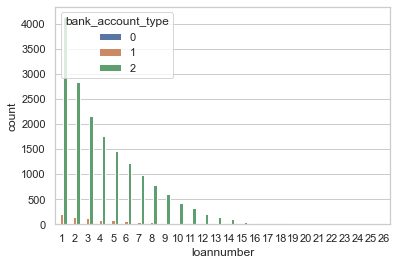

In [94]:
import seaborn as sns
sns.countplot(data=df, x='loannumber', hue='bank_account_type')
plt.savefig('loannumber_account_type.png')
plt.show()

In [36]:
df['employment_status_clients'].value_counts(normalize= True) #checking for the percentage of employment status 

Permanent        0.969642
Self-Employed    0.019139
Student          0.007809
Unemployed       0.003135
Retired          0.000220
Contract         0.000055
Name: employment_status_clients, dtype: float64

In [37]:
df['loanamount'].mean()

16501.23741956773

In [38]:
high_loan_amount = (df['loanamount'] > 16501.23741956773)

In [39]:
df.loc[high_loan_amount,['level_of_education_clients','employment_status_clients','bank_account_type']]

,level_of_education_clients,employment_status_clients,bank_account_type
2,Graduate,Permanent,Savings
5,Graduate,Permanent,Savings
6,Graduate,Permanent,Savings
7,Graduate,Permanent,Savings
10,Graduate,Permanent,Savings
...,...,...,...
18169,Graduate,Permanent,Savings
18172,Graduate,Permanent,Savings
18173,Graduate,Permanent,Savings
18177,Graduate,Permanent,Savings


In [40]:
filt = df['employment_status_clients'] == 'Permanent'
df.loc[filt]['good_bad_flag'].value_counts()

Good    16798
Bad       833
Name: good_bad_flag, dtype: int64

In [41]:
filt = df['level_of_education_clients'] == 'Graduate'
df.loc[filt]['good_bad_flag'].value_counts()

Good    17086
Bad       930
Name: good_bad_flag, dtype: int64

In [42]:
filt = df['bank_account_type'] == 'Savings'
df.loc[filt]['good_bad_flag'].value_counts()

Good    16500
Bad       762
Name: good_bad_flag, dtype: int64

In [43]:
df['loannumber'].nlargest(10) #the largest loannumbers

15547    26
15544    25
3837     24
3838     23
950      22
16774    22
3421     21
3840     21
3959     21
5221     21
Name: loannumber, dtype: int64

In [44]:
df['loanamount'].nlargest(10) #the largest loanamount

12817    60000.0
14346    60000.0
16231    60000.0
16774    60000.0
16776    60000.0
567      50000.0
743      50000.0
762      50000.0
831      50000.0
947      50000.0
Name: loanamount, dtype: float64

In [45]:
df['loanamount'].nsmallest(10) #the smallest loanamount

11439    3000.0
14975    3000.0
1355     4000.0
2032     4000.0
9631     4000.0
9632     4000.0
11460    4000.0
174      5000.0
986      5000.0
1023     5000.0
Name: loanamount, dtype: float64

In [46]:
df.sort_values(by=['customerid','loanamount'], ascending=[True, True], inplace = True)
df[['customerid', 'loanamount']].head(10)

,customerid,loanamount
1893,8a1088a0484472eb01484669e3ce4e0b,10000.0
5216,8a1a1e7e4f707f8b014f797718316cad,10000.0
17546,8a1a1e7e4f707f8b014f797718316cad,10000.0
7999,8a1a1e7e4f707f8b014f797718316cad,20000.0
16602,8a1a1e7e4f707f8b014f797718316cad,30000.0
8699,8a1a32fc49b632520149c3b8fdf85139,10000.0
8700,8a1a32fc49b632520149c3b8fdf85139,10000.0
12200,8a1a32fc49b632520149c3b8fdf85139,10000.0
14659,8a1a32fc49b632520149c3b8fdf85139,10000.0
14660,8a1a32fc49b632520149c3b8fdf85139,10000.0


In [47]:
df.sort_values(by=['customerid','loannumber'], ascending=[True, False], inplace = True)
df[['customerid', 'loannumber']].head(10)

,customerid,loannumber
1893,8a1088a0484472eb01484669e3ce4e0b,1
16602,8a1a1e7e4f707f8b014f797718316cad,4
7999,8a1a1e7e4f707f8b014f797718316cad,3
17546,8a1a1e7e4f707f8b014f797718316cad,2
5216,8a1a1e7e4f707f8b014f797718316cad,1
12199,8a1a32fc49b632520149c3b8fdf85139,7
7880,8a1a32fc49b632520149c3b8fdf85139,6
8699,8a1a32fc49b632520149c3b8fdf85139,5
14660,8a1a32fc49b632520149c3b8fdf85139,4
12200,8a1a32fc49b632520149c3b8fdf85139,3


<AxesSubplot:ylabel='bank_account_type'>

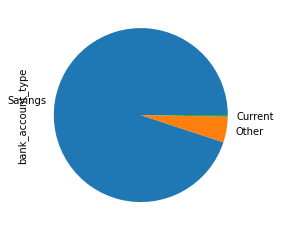

In [48]:
y = df['bank_account_type'].value_counts()
y.plot(kind='pie')

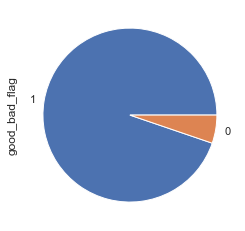

In [95]:
y = df['good_bad_flag'].value_counts()
y.plot(kind='pie')
plt.savefig('good_bad_defaulters.png')
plt.show()

In [50]:
df[['loannumber', 'loanamount', 'firstrepaiddate_quarter']].groupby(by=['loanamount','firstrepaiddate_quarter']).mean().sort_values(by=
                                                                ['loannumber'],ascending=False).head(10)

loannumber
loanamount firstrepaiddate_quarter            
60000.0    2                         21.000000
           3                         19.666667
50000.0    1                         16.833333
           3                         13.652174
           2                         13.574074
40000.0    3                         11.551887
           2                         10.788390
35000.0    2                         10.647059
           3                         10.200000
40000.0    4                         10.000000

In [51]:
df[['loanamount', 'customerid', 'firstrepaiddate_quarter']].groupby(by=['customerid','firstrepaiddate_quarter']).mean().sort_values(by=
                                                                ['loanamount'],ascending=False).head(10)

,,loanamount
customerid,firstrepaiddate_quarter,
8a858fa5552add5d0155536bd49343f9,3,60000.0
8a858fe5569398920156a3a9a77b5d02,2,55000.0
8a8589ec542eaa890154302eec276194,3,50000.0
8a858eba5591bf2801559680580a1f9e,2,50000.0
8a858e41579fc64b0157a8140dfb465e,3,50000.0
8a8589b953d0be470153d20503ec69ee,3,50000.0
8a858e0758715ccc0158716bbc9704d7,3,50000.0
8a85896653f0fed20154047ec0720b35,3,50000.0
8a858e645755e62201575e72c8b77fd5,3,50000.0


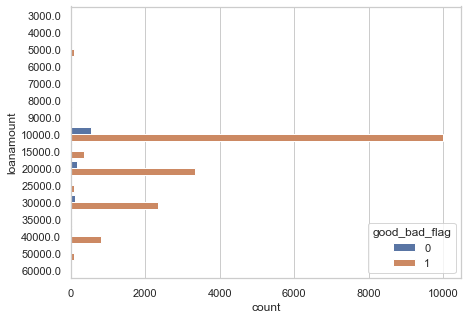

In [97]:
plt.figure(figsize=(7,5))
sns.countplot(y='loanamount', hue='good_bad_flag', data=df)
plt.savefig('loanamount & good_bad_flag.png')
plt.show()

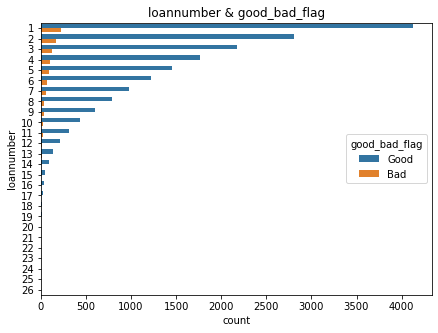

In [54]:
plt.figure(figsize=(7,5))
sns.countplot(y='loannumber', hue='good_bad_flag', data=df)
plt.title('loannumber & good_bad_flag')
plt.show()

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18183 entries, 1893 to 1216
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   bank_account_type           18183 non-null  object 
 1   bank_name_clients           18183 non-null  object 
 2   bank_branch_clients         18183 non-null  object 
 3   employment_status_clients   18183 non-null  object 
 4   level_of_education_clients  18183 non-null  object 
 5   good_bad_flag               18183 non-null  object 
 6   customerid                  18183 non-null  object 
 7   systemloanid                18183 non-null  int64  
 8   loannumber                  18183 non-null  int64  
 9   loanamount                  18183 non-null  float64
 10  totaldue                    18183 non-null  float64
 11  termdays                    18183 non-null  int64  
 12  referredby                  18183 non-null  object 
 13  firstrepaiddate_year        1

In [58]:
df['bank_account_type'][df['bank_account_type']== 'Savings'] = 2
df['bank_account_type'][df['bank_account_type']== 'Other'] = 1
df['bank_account_type'][df['bank_account_type']== 'Current'] = 0

C:\Users\OLADEJI\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\OLADEJI\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\OLADEJI\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel packag

In [83]:
df['bank_name_clients'].value_counts()

GT Bank        15435
12               590
Access Bank      432
0                353
2                301
3                282
9                150
13               145
17               121
1                103
5                102
14                55
10                28
11                23
7                 22
8                 19
15                15
16                 7
Name: bank_name_clients, dtype: int64

In [84]:
df['bank_name_clients'][df['bank_name_clients']== 'GT Bank'] = 6
df['bank_name_clients'][df['bank_name_clients']== 'First Bank'] = 12
df['bank_name_clients'][df['bank_name_clients']== 'Access Bank'] = 4
df['bank_name_clients'][df['bank_name_clients']== 'UBA'] = 0
df['bank_name_clients'][df['bank_name_clients']== 'Zenith Bank'] = 2
df['bank_name_clients'][df['bank_name_clients']== 'Diamond Bank'] = 3
df['bank_name_clients'][df['bank_name_clients']== 'EcoBank'] = 9
df['bank_name_clients'][df['bank_name_clients']== 'Stanbic IBTC'] = 13
df['bank_name_clients'][df['bank_name_clients']== 'FCMB'] = 17
df['bank_name_clients'][df['bank_name_clients']== 'Fidelity Bank'] = 1
df['bank_name_clients'][df['bank_name_clients']== 'Skye Bank'] = 5
df['bank_name_clients'][df['bank_name_clients']== 'Sterling Bank'] = 14
df['bank_name_clients'][df['bank_name_clients']== 'Wema Bank'] = 10
df['bank_name_clients'][df['bank_name_clients']== 'Union Bank'] = 11
df['bank_name_clients'][df['bank_name_clients']== 'Heritage Bank'] = 7
df['bank_name_clients'][df['bank_name_clients']== 'Keystone Bank'] = 8
df['bank_name_clients'][df['bank_name_clients']== 'Standard Chartered']= 15
df['bank_name_clients'][df['bank_name_clients']== 'Unity Bank'] = 16


C:\Users\OLADEJI\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\OLADEJI\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\OLADEJI\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel packag

In [62]:
df.drop(['bank_branch_clients'], axis=1, inplace=True)

In [78]:
df['employment_status_clients'][df['employment_status_clients']== 'Permanent']=1
df['employment_status_clients'][df['employment_status_clients']== 'Self-Employed']=4
df['employment_status_clients'][df['employment_status_clients']== 'Student']=3
df['employment_status_clients'][df['employment_status_clients']== 'Unemployed']=5
df['employment_status_clients'][df['employment_status_clients']== 'Retired']=2
df['employment_status_clients'][df['employment_status_clients']== 'Contract']=0

C:\Users\OLADEJI\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\OLADEJI\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\OLADEJI\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel packag

In [68]:
df['level_of_education_clients'][df['level_of_education_clients']== 'Graduate']=0
df['level_of_education_clients'][df['level_of_education_clients']== 'Secondary']=3
df['level_of_education_clients'][df['level_of_education_clients']== 'Post-Graduate']=1
df['level_of_education_clients'][df['level_of_education_clients']== 'Primary']=2

C:\Users\OLADEJI\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\OLADEJI\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\OLADEJI\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel packag

In [71]:
df['good_bad_flag'][df['good_bad_flag']== 'Good']=1
df['good_bad_flag'][df['good_bad_flag']== 'Bad']=0

C:\Users\OLADEJI\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\OLADEJI\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [85]:
df

,bank_account_type,bank_name_clients,employment_status_clients,level_of_education_clients,good_bad_flag,customerid,systemloanid,loannumber,loanamount,totaldue,...,closeddate_day,closeddate_quarter,approveddate_year,approveddate_month,approveddate_day,approveddate_quarter,creationdate_year,creationdate_month,creationdate_day,creationdate_quarter
1893,2,4,1,0,1,8a1088a0484472eb01484669e3ce4e0b,301960241,1,10000.0,11500.0,...,24,3,2017,7,2,3,2017,7,2,3
16602,2,6,1,0,1,8a1a1e7e4f707f8b014f797718316cad,301947045,4,30000.0,39000.0,...,26,3,2017,6,21,2,2017,6,21,2
7999,2,6,1,0,1,8a1a1e7e4f707f8b014f797718316cad,301916386,3,20000.0,24500.0,...,21,2,2017,5,23,2,2017,5,23,2
17546,2,6,1,0,1,8a1a1e7e4f707f8b014f797718316cad,301632940,2,10000.0,13000.0,...,15,3,2016,6,15,2,2016,6,15,2
5216,2,6,1,0,1,8a1a1e7e4f707f8b014f797718316cad,301620412,1,10000.0,13000.0,...,15,2,2016,5,13,2,2016,5,13,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10005,2,6,1,0,1,8a858fff5a36fe68015a3b8dcb8a3843,301873835,4,10000.0,11450.0,...,21,2,2017,4,19,2,2017,4,19,2
18111,2,6,1,0,1,8a858fff5a36fe68015a3b8dcb8a3843,301852396,3,10000.0,11500.0,...,17,2,2017,4,2,2,2017,4,2,2
7550,2,6,1,0,1,8a858fff5a36fe68015a3b8dcb8a3843,301830401,2,10000.0,13000.0,...,2,2,2017,3,3,1,2017,3,3,1
17405,2,6,1,0,1,8a858fff5a36fe68015a3b8dcb8a3843,301816673,1,10000.0,11500.0,...,28,1,2017,2,14,1,2017,2,14,1


Text(0.5, 1.0, 'Defaulting_clients_bank')

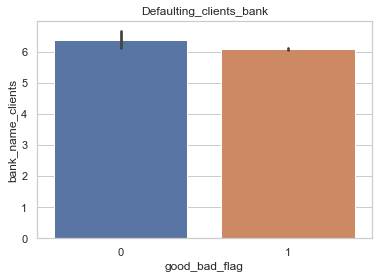

In [86]:
#Now plotting a Bar chart to see if the Applicants with the highest default

sns.set(style= "whitegrid")
sns.barplot (x= "good_bad_flag", y="bank_name_clients", data = df)
plt.xlabel("good_bad_flag")
plt.ylabel("bank_name_clients")
plt.title('Defaulting_clients_bank')

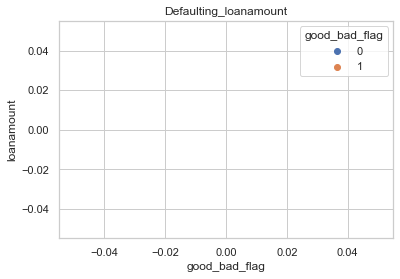

In [92]:
sns.set(style= "whitegrid")
sns.scatterplot (y="loannumber", hue="good_bad_flag", data=df)
plt.xlabel("good_bad_flag")
plt.ylabel("loanamount")
plt.title('Defaulting_loanamount')
plt.show()